# assignment 3
For the third assignment, we will now focus on the impact of a certain rainfall and the effect it has on the discharge downstream. We will use data of a full year to find and choose some specific rainfall with significant precipitation and will hope to see the changes on the discharge downstream. We are obviously looking forward to see the correlation between precipitation and the discharge, but in this assignment we will also try to see how big is the impact and the correlation between the two and examine the reasons for the differences. For that we will also look some information about the topography, climate and soil of the area that we chose to get more sense of how it affects the discharge we receive from a certain rainfall.

# Location
The station and river that I chose to explore in this assignment is the east branch of white clay creek (discharge) which is a river that's sitting next to the small town of Avondale, Pennsylvania.  Avondale is a a small borough in Chester county and its population is only 1200 people with a total area of 0.5 square miles.

In the next photos you can see one of the lovely houses Avondale has to offer and the beauty of the white clay creek.
From the two photos we can already notice about the green nature of the area that we will discuss more later.

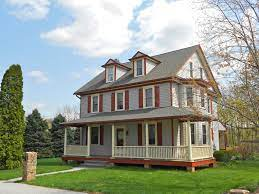
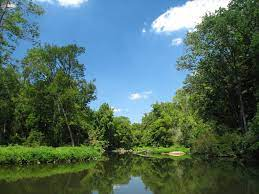

# soil type and ground coverage
Talking about soil type in Avondale from looking for some resources I found that it is limestone soil which is very fertile and productive. Therefor, in the Avondale area, we can find quite a lot of agricultural activity which means that talking about ground coverage, we found there many field crops and also knowing that it is a small town not that much of structure but more of a rural area. 
both of this facts indicate us that the ground coverage support quite good of infiltration area which mean less of the rainfall will effect downstream on the discharge.

Moving on to the soil itself and its Mechanical composition of sediments using a soil survey of Chester County, Pennsylvania the Avondale series consists of deep, well drained soils that formed in alluvium from mixed rocks with a taxonomic class of fine loamy soil. Again an indication of a soil which we can expect a good drainage and water infiltration.

Another conclusion from the two above is that the soil holds the water quite well and the big number of plants in the area from the crops and the vegetation takes a lot of water, which mean less of it get into the stream and effect less on the discharge.

# Climate and Evapotranspiration
Pennsylvania generally has a humid continental climate characterized by wide fluctuations in seasonal temperatures, with prevailing winds from the west. The average temperature in July is about 21C and in January about−2C. With that information and using a bit of the knowledge we acquired in our last assignment, we can say that the ET we expect to find in this area will not be too high because of the relatively cold weather and the humid climate of the area.
from these facts we assume that a rainfall will not be affected highly from evapotranspiration and will arrive to other destinations.


# topography

<img src="topo1.jpg" width="600" height="400">

We can see in the topographic map above that the height fall is quite dramatic in this area, especially when talking about the areas around the white clay creek we can see a drop of tens of meters in just a couple of hundred meter distance (each line is a 10 meter difference and each square is one kilometer).
With that said the area near the stream is a bit more flat and will allow more water to infiltrate the soil and less into the stream.
the conclusion of the data is mild but I assume because of the fact that we're talking about a small drainage basin and eventually the area near the stream and also in the town of Avondale is quite flat more water will infiltrate then continue as runoff into the stream

# Precipitation and discharge - results and discussion
##  Yearly precipitation and discharge
In this assignment, we will try and find some significant event of rain and the correlation it has with the discharge.  First, we will look on an yearly precipitation and discharge and will roughly try to find an extreme event and discharge with two graphs created with data from the year of 2021 for Avondale and white clay creek.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  # datetime converter for a matplotlib
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import matplotlib.dates as mdates
from ipywidgets import *
import matplotlib.patches as mpatches

# these will be useful when printing superscripts: m^2, m^3
squared = "\u00b2"
cubed = "\u00b3"

In [ ]:
## downloading precipitation data
data_file = "https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2021/CRNS0101-05-2021-PA_Avondale_2_N.txt"
df_p_2021= pd.read_csv(data_file,
                 header=None,                      # no headers needed, we'll do that later
                 delim_whitespace=True,            # blank spaces separate between columns
                 na_values=["-99.000", "-9999.0"]  # substitute these values for missing (NaN) values
                )
headers = pd.read_csv("https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/headers.txt",    # load headers file
                      header=1,                    # skip the first [0] line
                      delim_whitespace=True
                     )
df_p_2021.columns = headers.columns                       
# LST = local standard time
df_p_2021["LST_TIME"] = [f"{x:04d}" for x in df_p_2021["LST_TIME"]]  # time needs padding of zeros, then convert to string
df_p_2021['LST_DATE'] = df_p_2021['LST_DATE'].astype(str)            # convert date into string
df_p_2021['datetime'] = df_p_2021['LST_DATE'] + ' ' + df_p_2021['LST_TIME'] # combine date+time into datetime
df_p_2021['datetime'] = pd.to_datetime(df_p_2021['datetime'])        # interpret datetime
df_p_2021 = df_p_2021.set_index('datetime')                          # make datetime the index

#downloading discharge data
data_file = "https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&format=rdb&site_no=01478120&period=&begin_date=2021-01-01&end_date=2022-01-01"
df_q_2021 = pd.read_csv(data_file,
                        header=31,                      # no headers needed, we'll do that later
                        delim_whitespace=True,            # blank spaces separate between columns
                        na_values=["Bkw"]  # substitute these values for missing (NaN) values
                )
df_q_2021.columns = ['agency_cd', 'site_no','datetime','tz_cd','EDT','discharge','code']                       # rename df columns with headers columns
df_q_2021['date_and_time'] = df_q_2021['datetime'] + ' ' + df_q_2021['tz_cd'] # combine date+time into datetime
df_q_2021['date_and_time'] = pd.to_datetime(df_q_2021['date_and_time'])        # interpret datetime
df_q_2021 = df_q_2021.set_index('date_and_time')                          # make datetime the index
df_q_2021['discharge'] = df_q_2021['discharge'].astype(float)
df_q_2021['discharge'] = df_q_2021['discharge'] * 0.0283168 # convert cubic feet to m3

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
fig.subplots_adjust(hspace=0.25)

ax1.plot(df_p_2021['PRECIPITATION'])
ax2.plot(df_q_2021['discharge'], color="tab:green", lw=2)

ax1.set(xticks=[],
        ylabel="Precipitation \n (mm)/ 5 minutes)",
        title="Precipitation in Avondale - 2021")
ax2.set(xlabel="Date",
        ylabel="Discharge \n (m$^3$/5 minutes)"
       , title="Discharge in white clay creek - 2021")

plt.gcf().autofmt_xdate()  # makes slated dates


We can see that Avondale is relatively rainy area and we get rain all year round. Also, we can notice that even tough, we get rain all year round it is quite seasonal and the rainy season is between June and October. 
On the other hand, if we look at the discharge graph we can see that it is very stable and most of the time there are no changes is discharged even after events of rain. Most of the changes in discharge, roughly say, are after big events of rain or long (in days) events of rain. 

## specific event of rain - 25 - 27/10/2021
We will now zoom in on a specific event of rain and discharge which will make us easy to see the effect of the precipitation on the discharge

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.25)

start = "2021-10-25"
end = "2021-10-26"
ax1.plot(df_p_2021[start:end]['PRECIPITATION'])
ax2.plot(df_q_2021[start:end]['discharge'], color="tab:green", lw=2)

ax1.set(xticks=[],
        ylabel="Precipitation \n (mm/ 5 minutes)"
        ,xlabel="date and hour" ,
        title="Precipitation in Avondale \n 25-27/10/2021")
ax2.set(xlabel="Date and time",
        ylabel="Discharge \n (m$^3$/5 minutes)"
        , title="Discharge in white clay creek \n 25-27/10/2021 ")

plt.gcf().autofmt_xdate()  # makes slated dates

In the next graph we can see an event of rain that the majority of it is approximately around 6 hours. I chose this event because it is the second rainiest day of the year and it is expected to find a followed discharge that is affected by it. (That was after examine the rainy day and finding not as good correlation - that is why I chose the second rainiest day).
In the two graphs we can see a flat curve until around 18:00 of the 25th and then in the upper precipitation graph can see the beginning of the rain event for a few hours. When looking now at the discharge graph we can notice that it takes a few hours until the rain started to show it marks on the discharge. Also not only it start changing later then the rain starts, it also last few hours after the rain stops. We can assume the reason for the delay is that it takes time for all the rain the flow as runoff on the surface and reach the stream And also to flow in the stream itself and accumulate until it makes an effect on the measuring station. Another reason that can make the runoff take longer to reach the stream is the vegetation and the field crops that stops the water from running freely as we mention in the introduction. As we said the area near the stream is not that steep what makes the water grab less speed and get stuck in more obstacles which is another reason for the delay we see in the graph.

We can also notice in the discharge graph the steepness of the curve. since our drainage area is 11.3 which is not that big (after comparing with other locations in the map) we can assume most of the rain which ends up in the stream makes it fast and that is why the curve is quite steep.

## calculating the rate of effective water input (p *) and the event flow rate (q *)

We will now move on and check some more details about our rain event and followed discharge. We will calculate Q, P, p *, q *, Q *.

<img src= https://yairmau.github.io/website/archive/hydrology/hydrology_figures/dingman-box10.1.png width="600" height="400">

### Base flow
Base flow is the portion of streamflow that is presumed to have entered the watershed in previous events and to be derived from persistent, slowly varying sources (Ground water is usually assumed to be the main, if not the only, such source).

### Event flow
Event flow (also called direct runoff, storm runoff, quick flow, or storm flow) is considered to be the direct response to a given water-input event.

### Total flow
Total flow rate at any instant $q(t)$ is the sum of event-flow rate $ q^*(t) $ and base-flow rate $ q_{BF}(t)$:

$$
q(t) = q^*(t) + q_{BF}(t)
$$

In [ ]:
# Drainage area: 11.3 square miles
area = 11.3 / 0.00000038610  # squared miles to squared meters
start = "2021-10-25 00:00:00"
end = "2021-10-27 00:00:00"

# time resolution for p and q is 5 minutes
delta_t_precipitation = 5 * 60  # in seconds
delta_t_discharge = 5 * 60     # in seconds

df_p = df_p_2021.loc[start:end]['PRECIPITATION'].to_frame()
df_q = df_q_2021.loc[start:end]['discharge'].to_frame()

# convert mm to m3.
#  a) it is understood that 1 mm = 1 L/m2 = 1e-3 m3/m2.
#  b) divide by 1000 to convert mm to m3/m2
#  c) multiply by area (m2) to obtain total volume (m3) in whole watershed

df_p['precipitation'] = df_p['PRECIPITATION'].values * area / 1000  # mm to m3 in the whole watershed

# precipitation depth was originally given in mm in 5-min windows

# divide by delta_t_precipitation = 5*60 to obtain finally m3/s
df_p['precipitation'] = df_p['precipitation'] / delta_t_precipitation

# Total volumes (m3) = sum of all bars times bar width (delta_t)
P = df_p['precipitation'].sum() * delta_t_precipitation
Q = df_q['discharge'].sum() * delta_t_discharge

# #uncomment for results
# print(f"total precipitation during event:\nP = {P:.1e} m{cubed}")
# print(f"total streamflow during event:\nQ = {Q:.1e} m{cubed}")
# print(f"Streamflow is {Q/P:.0%} of precipitation")

After calculating  the total precipitation during our rain event we received the amount of 1. 6E^6 m^3. When checking the same period talking about the discharge change we found 5. 7E^4 m^3. It's easy to see that the two numbers are very different and to be precise the total discharge is only 4% of the total precipitation.  Q is combined from base flow+event flow (q *). In the next graph we will try to separate the two and finding q * and Q * which will represent us the total amount of direct response to our given rain event.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
fig.subplots_adjust(wspace=0.01)

ax1.plot(df_q['discharge'], color="black", lw=2)
# choose 2 by trial and error
point1 = pd.to_datetime("2021-10-25 21:45:00")
point2 = pd.to_datetime("2021-10-26 11:00:00")
two_points = df_q.loc[[point1, point2], 'discharge']
ax1.plot(two_points, 'o', color="tab:red")

# make new dataframe with the two chosen points
df_linear = pd.DataFrame(data=two_points, index=two_points.index)
# produce more points every 5 minutes by linear interpolation
df_linear = (df_linear.resample("15min")            # resample
                      .interpolate(method='time')  # interpolate by time (linear)
            )
ax1.plot(df_linear, color="tab:red")

# shade blue the region between the two curves
df_between_2_points = df_q.loc[df_linear.index]
ax1.fill_between(df_between_2_points.index, df_between_2_points['discharge'],
                 y2=df_linear['discharge'],
                 color="tab:blue", alpha=0.3)

# calculate qstar = q - q_baseflow
qstar = df_q.loc[df_linear.index, 'discharge'] - df_linear['discharge']
Qstar = qstar.sum() * delta_t_discharge

ax2.plot(qstar, color="black", lw=2)
ax2.fill_between(qstar.index, qstar,
                 y2=0.0,
                 color="tab:blue", alpha=0.3)

ax1.set(xlim=[df_q.index[0],
              df_q.index[-1]],
        xlabel=r"Date and time",
        ylabel="Discharge \n (m$^3$/s)",
        ylim=[0, 6],
        yticks=[0,1,2,3,4,5,6],
        title="Total discharge \n q(t)")
ax2.set(yticks=[],
        ylim=[0, 6],
        xlim=[df_q.index[0],
              df_q.index[-1]],
        xlabel=r"Date and time",
        ylabel = "Discharge \n (m$^3$/s)",
        title="Effective discharge \n q*(t)"
       )
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.gcf().autofmt_xdate()  # makes slated dates

ratio = Qstar/ P
pstar = df_p['precipitation'] * ratio  # m3/s
Pstar = pstar.sum() * delta_t_precipitation # m3

In the two graphs above, we first looked at the total discharge with time. We used a method which we choose two points that we think are the beginning and the end of the discharge which is effected by the rain and pull a line between those two points which represent q *. The part below the line is the base flow while the part below printed in blue is the part the impact by the rain event. To calculate the total discharge we flattened the blue part to the x axes and summed it using an integral receiving 29775 m^3 which is our Q *.



In [ ]:
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# two line plots
start, end = "2021-10-25 17:00:00","2021-10-26 04:00:00" 
ax.plot(pstar.loc[start:end], color="blue", label = "p*" )
ax.plot(df_p['precipitation'][start:end], color="red", label = "p" )
# axes labels and figure title
ax.set_xlabel('date')
ax.set_ylabel('percipitation (m$^3$/s)')
ax.set_title('Fallbrook p and p* rain event')
ax.legend(loc='upper right')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates

With this data that we collected we can now know the portion of the rain that actually reach into the stream by dividing Q * with the total precipitation and in our case we receive that only 2% which seems like a tiny number. I would expect more rain to reach as runoff into the stream, but it seems like 98% of it "disappears ". In the next graph that shows the actual rain in red (p) with the portion of it ends up in the stream in blue (p *) we can see it even clearer.

Assuming and hoping that my numbers and calculations are right, we will now try to explain the reason of this very small portion of rain ends up in the stream. First of all we shouldn't be afraid of that small number since we already learned in class and know that usually the fraction is very small. We know that the reminder rain and in our case 98% ends up in another 3 options 1. evapotranspiration 2. stream flow that occurs later than the rain event and dosent directly connected to it 3. ground water that out flow from the water shed.

We will remind briefly of the 3 factors that we talked about already in the introduction. Talking about climate and evapotranspiration we saw that the area is quite humid and also pretty cold (-2 in January) and for our event period is around winter (October) we wouldn't expect much water to go with the first factor of evapotranspiration.

The two other factors talked about "losing" water into the ground. As we have seen the topography of the near area of the stream is quite flat so we can believe that water have more time to infiltrate the ground and appear not in direct link to the rain event or even to flow out from the watershed. This also contributed from the fact that we talked about of the well drained soils formed in alluvium of fine loamy soil.

Another very important factor which is also contributed by the pretty flat area around the stream and the well drained soil and also the fertile soil is the fact there are lots of field crops, but even more important near the stream lots of natural vegetation which obviously takes lots of the water. With all the last facts the vegetation has more time to use the water and grow, which after growing consume even more water to even in larger this effect.


# Time lags - results and discussion
<img src= https://yairmau.github.io/website/archive/hydrology/hydrology_figures/dingman-figure10.12.png width="600" height="400">
<img src= https://yairmau.github.io/website/archive/hydrology/hydrology_figures/dingman-table10.2.png width="600" height="400">

Until now we have focused on the amount of water in different parameters, but now we will focus on the time lags of some key moments between the rain event and the impact of it on the discharge.

we will now calculate the centroid ($t_pc$) for effective precipitation $p*$ and centroid ($t_{qc}$) of effective discharge $q*$.We will also calculate the time of peak discharge ($t_{pk}$). Then, we will calculate the centroid lag ($T_{LC}$), the centroid lag-to-peak ($T_{LPC}$), and the time of concentration ($T_c$). 

### We will use the equations below:

$T_{LPC} \simeq 0.60 \cdot T_c$

Time of precipitation centroid:

$$
t_{pc} = \frac{\displaystyle \sum_{i=1}^n p_i^* \cdot t_i}{P^*}
$$

Time of streamflow centroid:

$$
t_{qc} = \frac{\displaystyle \sum_{i=1}^n q_i^* \cdot t_i}{Q^*}
$$


Centroid lag:

$$
T_{LC} = t_{qc} - t_{pc}
$$

Centroid lag-to-peak:
$$
T_{LPC} = t_{pk} - t_{pc}
$$


Time of concentration:
$$
T_{LPC} \simeq 0.60 \cdot T_c
$$

In [ ]:
pstar = (pstar.resample("15min")            # resample
                      .interpolate(method='time')  # interpolate by time (linear)
            )
# pstar centroid
# time of the first (nonzero) rainfall data point
t0 = pstar[pstar != 0.0].index[0]
# time of the last (nonzero) rainfall data point
tf = pstar[pstar != 0.0].index[-1]
# duration of the rainfall event, in minutes
td = (tf-t0) / pd.Timedelta('1 min')
# make time array, add 2.5 minutes (half of dt)
time = np.arange(0, td+1, 15) + 7.5
# create pi array, only with relevant data (during rainfall duration)
pi = pstar.loc[(pstar.index >= t0) & (pstar.index <= tf)]
# convert from m3/5min to m3/s
pi = pi.values * 60 * 15
# time of precipitation centroid
t_pc = (pi * time).sum() / pi.sum()
# add initial time
t_pc = t0 + pd.Timedelta(minutes=t_pc)
t_pc

# qstar centroid
# time of the first (nonzero) discharge data point
t0 = qstar[qstar != 0.0].index[0]
# time of the last (nonzero) discharge data point
tf = qstar[pstar != 0.0].index[-1]
# duration of the discharge event, in minutes
td = (tf-t0) / pd.Timedelta('1 min')
# make time array, add 2.5 minutes (half of dt)
time = np.arange(0, td+1, 15) + 7.5
# create qi array, only with relevant data (during discharge duration)
qi = qstar.loc[(qstar.index >= t0) & (qstar.index <= tf)]
# convert from m3/5min to m3/s
qi = qi.values * 60 * 5
# time of discharge centroid
t_qc = (qi * time).sum() / qi.sum()
# add initial time
t_qc = t0 + pd.Timedelta(minutes=t_qc)
t_qc

# time of peak discharge
max_discharge = qstar.max()
t_pk = qstar[qstar == max_discharge].index[0]

# centroid lag
T_LC = t_qc - t_pc

# centroid lag-to-peak
T_LPC = t_pk - t_pc

# time of concentration
T_c = T_LPC / 0.60

# # to see result uncomment below
# print(f"T_LC = {T_LC}")
# print(f"T_LPC = {T_LPC}")
# print(f"T_c = {T_c}")

## conclutions 
After using the equations above we can see now some of the parameters belong to our stations talking about time lags. 

T_LC represents the time between the center of mass of the rain and the center of mass of the excretion. In our case the result for this parameter is 4:51:20 hours, which is quite a long time. Generally speaking the drainage area is not that big so this result might be a bit surprising since it would be expected that the center of mass of the excretion will be shorter. A possible reason for this factor might be the spread of the rain for a few hours, which shift the center of mass of the extraction to the right.

T_LPC   represents the time elapsed between the mass precipitation center and the peak measured in the flow rate of the stream. Again, quite a very long time passed between the two - 4:14:39. Same for different results we received before we can say that the flat area around the stream, lots of vegetation and the relatively good infiltration of the soil make the process of water reaching the stream slower.

T_C  is the time of concentration, which the time it takes water to travel from the hydraulically most distant part of the contributing area to the outlet. Because the T_C is calculated from T_LC which in our case is a long time we will obviously receive quite a long time talking about T_C and in our case 7:04:24 hours.



# summary and main results and parameters
| Parameter | result | 
| --- | --- | 
| Drainage area|11.3 squre km  |
| Q | 5. 7E^4 m^3 |
| P | 1. 6E^6 m^3 |
| Q* | 29775 m^3 |
|T_LC  | 4:51:20 hours |
| T_LPC | 4:14:39 hours|
|T_C  | 7:04:24 hours|

In this assignment, we took two measuring points of two different parameters - one of precipitation (Avondale) and one of discharge (White clay creek). We wanted to check some values about the effect of the rain on the stream talking about volume and time. We assumed that the rain in the area was spread evenly and we wanted to check the correlations between the rain and the discharge. After zooming in on a specific event of rain we found that there is good correlation Between the 25-27/10/2021 as we can see a few hours of rain followed by changes in the discharge. 
Talking about the actual rain that reaches into the stream we found a very small number of only 2%.
We also checked the time lags of some key points and received results for T_LC, T_LPC and T_C.

After reviewing in the introduction some of the elements about our area talking about topography, soil type and infiltration,  climate and evaportranspiration, agriculture in the area and vegetation we tried to assume and evaluate the main factors for our results. 
As we discussed there are more factors contributing the rain reaching other destinations than the stream which will also support the relative short time we received.